
# Fourier Filter Example

This script illustrates using geocat-comp's [`fourier_filter`] (https://geocat-comp.readthedocs.io/en/latest/user_api/generated/geocat.comp.fourier_filters.fourier_filter.html) function for xxx different input values: xxx.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

import geocat.comp as gc
import geocat.datafiles as gdf

## Read in data

Open a netCDF data file using xarray default engine and load the data into xarrays. In this example we're using the [`CO-OPS_9415020_wl.csv` file](https://github.com/NCAR/geocat-datafiles/tree/main/ascii_files) from [`geocat-datafiles`](https://github.com/NCAR/geocat-datafiles) package.

In [7]:
dataset = xr.DataArray(pd.read_csv(
    gdf.get("ascii_files/CO-OPS_9415020_wl.csv")))
xr_data = dataset.loc[:, 'Verified (ft)']

Let's take a look at the raw data.

In [8]:
xr_data

<xarray.DataArray (dim_0: 7440)>
array([0.33, 0.22, 0.14, ..., 2.8, 2.62, 2.47], dtype=object)
Coordinates:
  * dim_0    (dim_0) int64 0 1 2 3 4 5 6 ... 7433 7434 7435 7436 7437 7438 7439
    dim_1    <U13 'Verified (ft)'

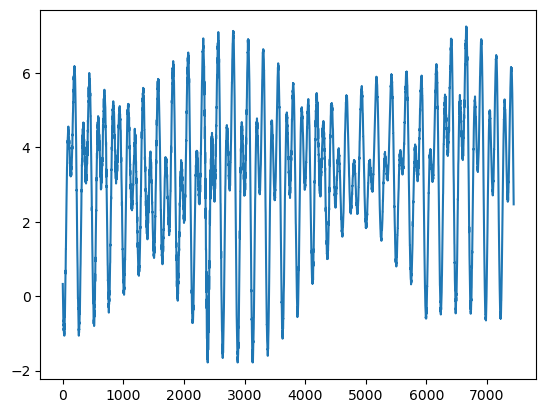

In [5]:
plt.plot(xr_data)

## Calculate Low Frequency Fourier Filter

We will calculate the fourier transform of our data using four different filters. Let's start with a low frequency fourier filter.

In [10]:
# Set points per hour
data_freq = 10

# Set tide cycle and frequency resolution
tide_freq1 = 1 / (1 * 12.4206)
res = data_freq / (len(xr_data))

# Define cutoff_frequency_low and cutoff_frequency_high based on tide frequency
cflow1 = tide_freq1 - res * 5
cfhigh1 = tide_freq1 + res * 5

filter1 = gc.fourier_filter(xr_data,
                         data_freq,
                         cutoff_frequency_low=cflow1,
                         cutoff_frequency_high=cfhigh1,
                         band_block=True)

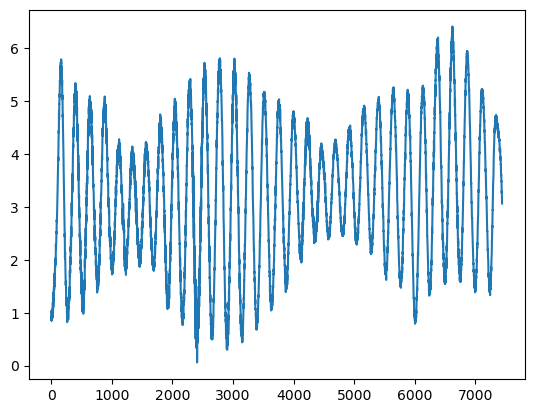

In [11]:
plt.plot(filter1)

In [13]:
tide_freq2 = 1 / (2 * 12.4206)

cflow2 = tide_freq2 - res * 5
cfhigh2 = tide_freq2 + res * 5

filter2 = gc.fourier_filter(xr_data,
                         data_freq,
                         cutoff_frequency_low=cflow2,
                         cutoff_frequency_high=cfhigh2,
                         band_block=True)

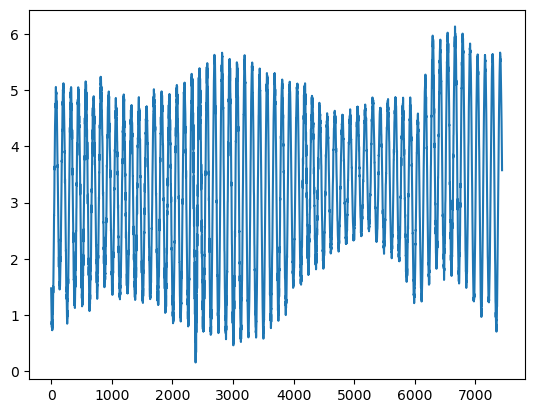

In [14]:
plt.plot(filter2)

/var/folders/dd/_xm_pbpd3flgbvbnt7qhd70snnbpj_/T/ipykernel_3339/127955180.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/dd/_xm_pbpd3flgbvbnt7qhd70snnbpj_/T/ipykernel_3339/127955180.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


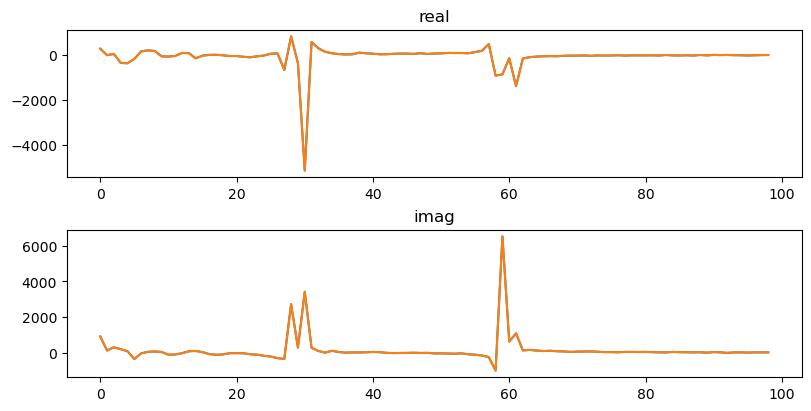

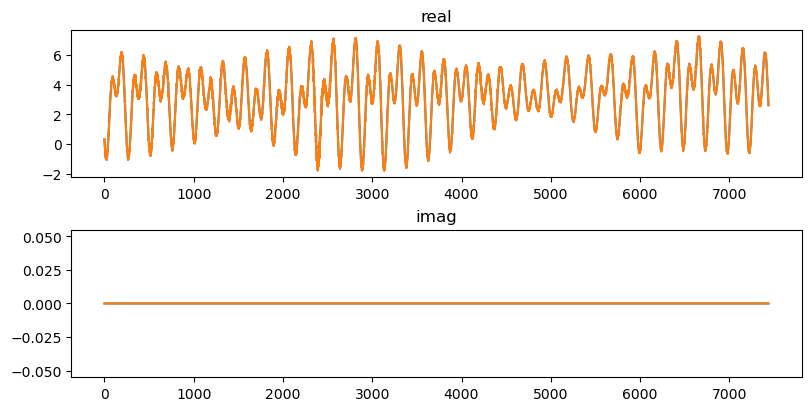

In [15]:
fig, axs = plt.subplots(2, 1, dpi=100, figsize=(8, 4), constrained_layout=True)

# Plot the real set of data utilizing NumPy's Fourier Transform function using both
# the original data and the fourier_filter applied to the second set of cutoffs
axs[0].set_title('real')
axs[0].plot(np.real(np.fft.fft(xr_data)[1:100]))
axs[0].plot(np.real(np.fft.fft(xr_data)[1:100]))

# Plot the imaginary set of data utilizing NumPy's Fourier Transform function using both
# the original data and the fourier_filter applied to the second set of cutoffs
axs[1].set_title('imag')
axs[1].plot(np.imag(np.fft.fft(xr_data)[1:100]))
axs[1].plot(np.imag(np.fft.fft(xr_data)[1:100]))

# Show figure
fig.show()

# Generate figure with 2 by 1 subplots and set its size (width, height) in inches
fig, axs = plt.subplots(2, 1, dpi=100, figsize=(8, 4), constrained_layout=True)

# Define start and end of data indices
start = 0
end = -1

# Plot the real and imaginary sets of data from the original and filtered data
axs[0].set_title('real')
axs[0].plot(np.real(xr_data)[start:end])
axs[0].plot(np.real(xr_data)[start:end])
axs[1].set_title('imag')
axs[1].plot(np.imag(xr_data)[start:end])
axs[1].plot(np.imag(xr_data)[start:end])

# Show plot
fig.show()